In [1]:
import numpy as np
from scipy.integrate import simpson
from nozzle import Spectral, Params, Nozzle, Boundary
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
N = 501
Mm = 1.0
constant_v = False
accelerating = True
boundary = Boundary.FIXED_FIXED

params = Params(Mm, constant_v, accelerating, boundary)
spectral = Spectral(N, "symmetric", "FD")
nozzle = Nozzle(params, spectral.x)
v0 = nozzle.v0
B = nozzle.B
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2



<AxesSubplot:xlabel='$z$', ylabel='$\\tilde{v}$'>

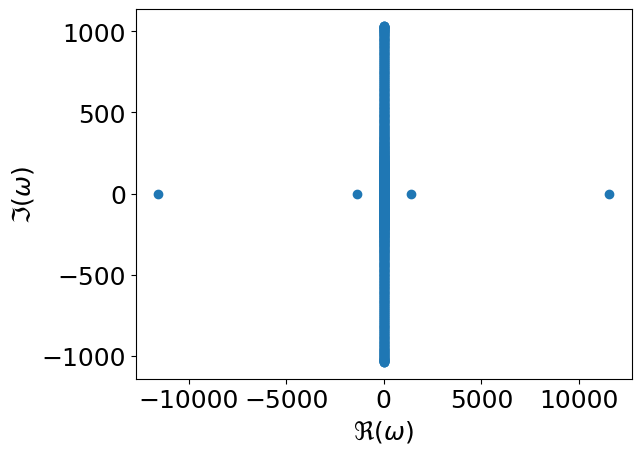

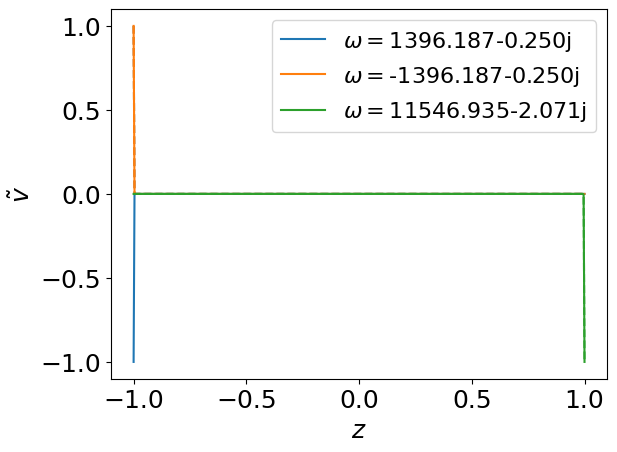

In [7]:
rho = B/v0
A2 = -np.diag(rho)
A1 = -2j*np.diag(rho*v0)
A0 = np.diag(rho*v0**2)@D2 \
    - np.diag(rho*( v0*(D2@v0) + (D1@v0)**2 )) \
    - np.diag(B*v0*(D1@v0))@(np.diag(D1@(rho/B)) + np.diag(rho/B)@D1)
xi, Omega = nozzle.solve(A0,A1,A2)
nozzle.omega = Omega
nozzle.V = xi
nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions()